In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

**Data Preprocessing**


# Training Image preprocessing

In [2]:

training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Recognition/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


# Validation Image Preprocessing

In [4]:

validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Recognition/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


# Building Model

In [5]:

cnn = tf.keras.models.Sequential()


# Building Convolution Layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [8]:

cnn.add(tf.keras.layers.Dropout(0.25))

In [8]:

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [9]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [10]:
cnn.add(tf.keras.layers.Flatten())

In [11]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))


In [12]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting


In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))


# Compiling and Training Phase

In [15]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                   

In [23]:

training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)


Epoch 1/32
98/98 [==============================] - 628s 6s/step - loss: 6.2031 - accuracy: 0.0424 - val_loss: 3.3671 - val_accuracy: 0.0513
Epoch 2/32
98/98 [==============================] - 146s 1s/step - loss: 3.4052 - accuracy: 0.0520 - val_loss: 3.2365 - val_accuracy: 0.0598
Epoch 3/32
98/98 [==============================] - 137s 1s/step - loss: 3.2591 - accuracy: 0.0793 - val_loss: 3.0735 - val_accuracy: 0.1168
Epoch 4/32
98/98 [==============================] - 141s 1s/step - loss: 3.1785 - accuracy: 0.0825 - val_loss: 2.9898 - val_accuracy: 0.1681
Epoch 5/32
98/98 [==============================] - 149s 1s/step - loss: 3.0810 - accuracy: 0.1159 - val_loss: 2.7670 - val_accuracy: 0.1766
Epoch 6/32
98/98 [==============================] - 142s 1s/step - loss: 2.9345 - accuracy: 0.1464 - val_loss: 2.5186 - val_accuracy: 0.2279
Epoch 7/32
98/98 [==============================] - 140s 1s/step - loss: 2.7971 - accuracy: 0.1730 - val_loss: 2.3802 - val_accuracy: 0.3362
Epoch 8/32
98

# Evaluating Model

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)


98/98 [==============================] - 1205s 11s/step - loss: 38.2647 - accuracy: 0.0308
Training accuracy: 0.030818618834018707


In [26]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 [==============================] - 13s 257ms/step - loss: 0.4677 - accuracy: 0.9288
Validation accuracy: 0.9287749528884888


# Saving Model

In [ ]:
cnn.save('trained_model.h5')



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [28]:

training_history.history #Return Dictionary of history


{'loss': [6.2031097412109375,
  3.4051735401153564,
  3.2591066360473633,
  3.1785166263580322,
  3.080998659133911,
  2.9345037937164307,
  2.7970545291900635,
  2.674487352371216,
  2.50496768951416,
  2.3605692386627197,
  2.1219441890716553,
  2.001784086227417,
  1.8770740032196045,
  1.6054736375808716,
  1.3861044645309448,
  1.2079204320907593,
  1.178553819656372,
  0.9644074440002441,
  1.024819016456604,
  0.9916019439697266,
  0.7375196218490601,
  0.6257712244987488,
  0.529195249080658,
  0.5689364671707153,
  0.5763904452323914,
  0.5099665522575378,
  0.41442182660102844,
  0.35667884349823,
  0.3328142762184143,
  0.34641504287719727,
  0.3221428394317627,
  0.34802353382110596],
 'accuracy': [0.0423756018280983,
  0.052006419748067856,
  0.07929374277591705,
  0.08250401169061661,
  0.11589085310697556,
  0.146388441324234,
  0.1730337142944336,
  0.2038523256778717,
  0.2455858737230301,
  0.2908507287502289,
  0.35987159609794617,
  0.4000000059604645,
  0.427929371

In [29]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [30]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Calculating Accuracy of Model Achieved on Validation set

In [31]:

print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 92.87749528884888 %


# Accuracy Visualization

# Training Visualization

In [32]:
#training_history.history['accuracy']

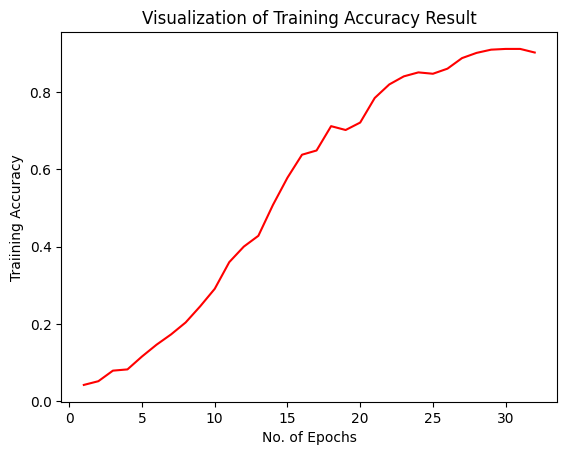

In [33]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

# Validation Accuracy

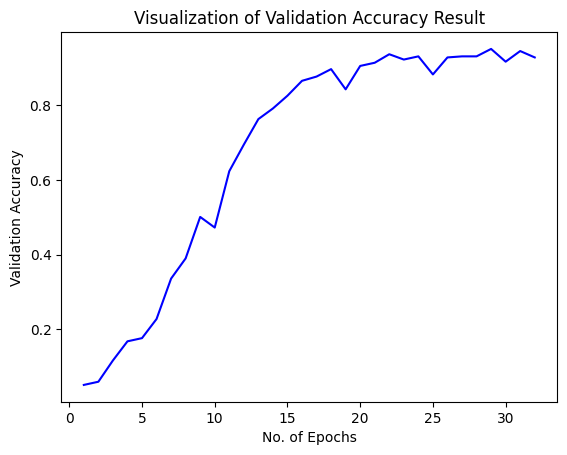

In [34]:

plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

# Test set Evaluation

In [37]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Recognition/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 359 files belonging to 36 classes.


In [38]:

test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)


12/12 [==============================] - 63s 1s/step - loss: 0.4592 - accuracy: 0.9304
Test accuracy: 0.9303621053695679
